In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 6.4 MB 10.5 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=f7f683091a15c31f4663d925f522c8a40bd67ee4c00681b9bca01a716e42d70e
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

# 1. ARIMA

In [4]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
visadf = yf.download("V", start="2017-01-01", progress=False)
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
fiservdf = yf.download("FISV", start="2017-01-01", progress=False)
paypaldf = yf.download("PYPL", start="2017-01-01", progress=False)

In [5]:
amexdf.head(3)
visadf.head(3)
mastercarddf.head(3)
fiservdf.head(3)
paypaldf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781258,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925186,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050957,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844215,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472504,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381081,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280426,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250908,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048386,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,53.41,53.845001,53.244999,53.669998,53.669998,2142600
2017-01-04,53.66,54.365002,53.654999,54.325001,54.325001,1359000
2017-01-05,54.23,54.590000,54.005001,54.305000,54.305000,1662400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.290001,40.980000,40.000000,40.250000,40.250000,8247400
2017-01-04,40.349998,41.029999,40.044998,41.000000,41.000000,6806400
2017-01-05,41.430000,41.720001,41.040001,41.060001,41.060001,6432000


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["lines.linewidth"] = 5.0

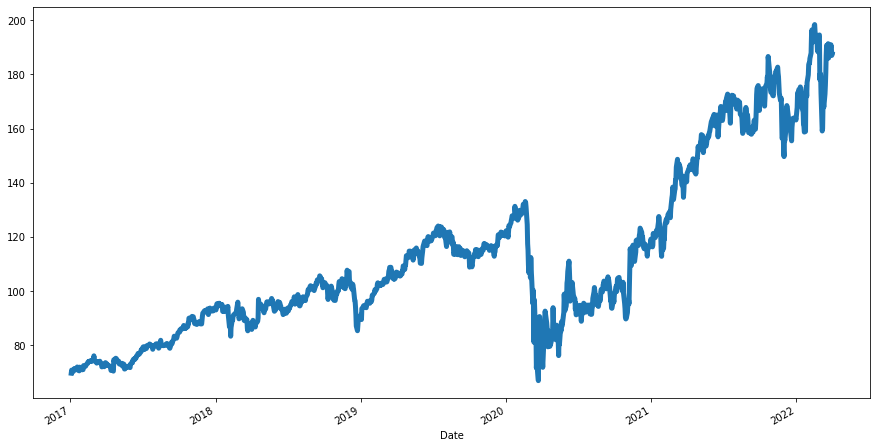

In [7]:
amexdf["Adj Close"].plot()

In [8]:
amexdf.isnull().sum().sum()

0

In [9]:
amexdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1.322000e+03
mean,115.912050,117.084475,114.703639,115.899289,112.497416,3.890905e+06
std,30.126447,30.494167,29.750923,30.112404,31.564493,1.899180e+06
min,72.540001,75.419998,67.000000,68.959999,67.033676,7.070000e+05
25%,95.067497,96.274998,93.890001,95.184999,91.283367,2.735150e+06
50%,106.825001,107.835003,106.250000,106.855000,102.765274,3.361100e+06
75%,126.962503,128.044998,126.382500,127.180002,123.582642,4.422100e+06
max,197.500000,199.550003,197.240005,198.380005,198.380005,1.726170e+07


In [10]:
# ril_monthly_df = rildf.resample("1m").mean().sort_values(by="Date", ascending=False)
amex_monthly_df = amexdf.resample("1m").mean()
amex_monthly_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,76.532000,77.120500,75.928000,76.501500,71.134925,5.195245e+06
2017-02-28,78.704211,79.168947,78.346842,78.858949,73.342338,3.464032e+06
2017-03-31,79.118261,79.640869,78.648260,79.076086,73.544287,4.291339e+06


In [11]:
# amex_monthly_df['Adj Close'].plot()

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12)
# figure = decomposition.plot()
# plt.show()

In [13]:
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781258,5853900,NaN
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925186,4635800,0.016260
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050957,3383000,-0.012403


In [14]:
amexdf.dropna(inplace=True)

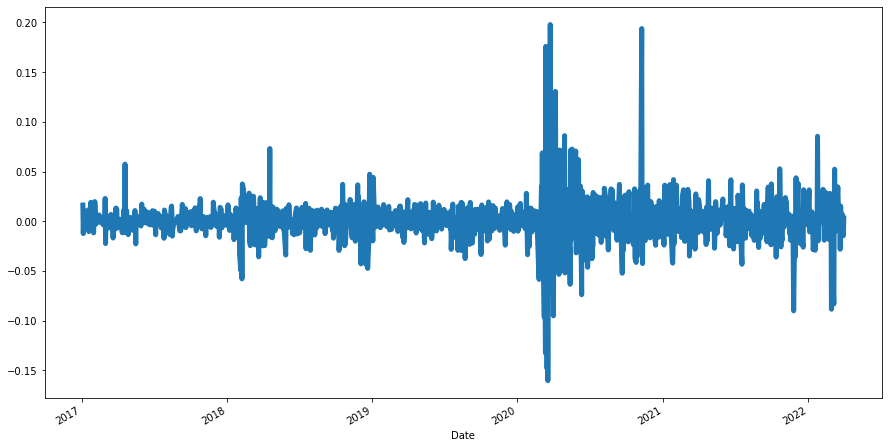

In [15]:
amexdf.Return.plot()

In [16]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12, model="multiplicative")
# figure = decomposition.plot()
# plt.show()

In [17]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Return"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Return"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Return"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Return"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (22350.371628083878, 0.0)
AndersonResult(statistic=48.90639906157003, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.46809056122589304, pvalue=7.21777219202825e-266)
ShapiroWilkTest 0.8045161962509155 3.2935675174137002e-37


In [18]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Adj Close"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Adj Close"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Adj Close"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Adj Close"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (177.8404475954744, 0.0)
AndersonResult(statistic=47.542756622867046, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.8999772667884827 1.6433507621919353e-28


In [19]:
# from numpy.random import randn
# data = 5 * randn(100) + 5

In [20]:
# # Tests of Normality
# import scipy.stats as ss

# # Jarque–Bera Test
# statistic = ss.jarque_bera(data)
# print("JarqueBeraTest", statistic)

# # Anderson-Darling Normality Test
# statistic = ss.anderson(data)
# print(statistic)

# # Kolmogorov-Smirnov Test
# statistic = ss.kstest(data, 'norm')
# print(statistic)

# # Shapiro-Wilk Test
# statistic, pvalue = ss.shapiro(data)
# print(f"ShapiroWilkTest ({statistic}, {pvalue})")

In [21]:
# Tests of Stationarity
from statsmodels.tsa import stattools
from statsmodels.stats import diagnostic

# Augmented Dickey Fuller Test
statistic = stattools.adfuller(amexdf["Return"])
print("AugmentedDickeyFullerTest", statistic)

# Ljung-Box Test (test for auto-correlation)
statistic = diagnostic.acorr_ljungbox(amexdf["Return"], lags=[1])
print("LjungboxTest", statistic)

AugmentedDickeyFullerTest (-14.652384898059145, 3.483899675224383e-27, 6, 1314, {'1%': -3.435336393256612, '5%': -2.863742089354917, '10%': -2.5679424031562683}, -6308.720170146972)
LjungboxTest     lb_stat  lb_pvalue
1  8.993815   0.002709


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


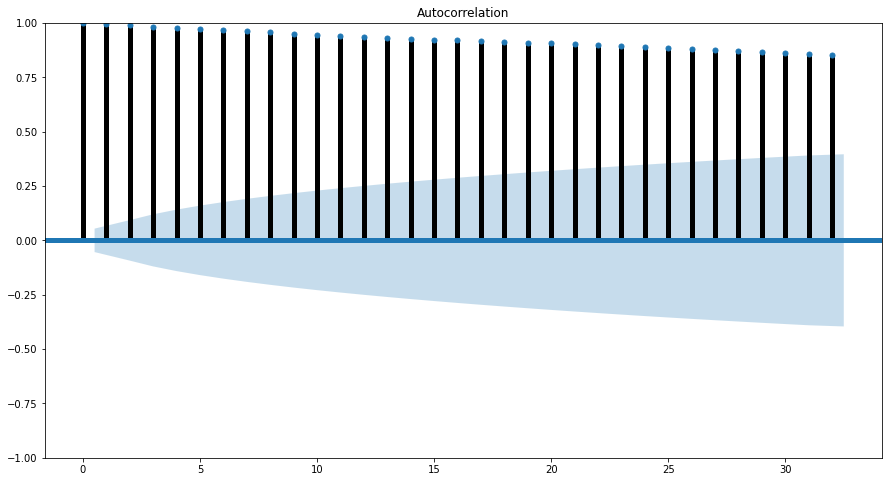

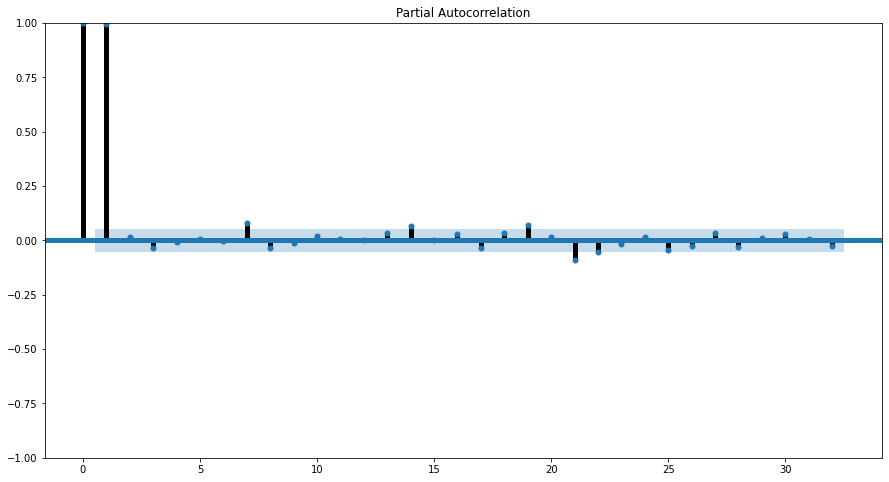

In [22]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Adj Close"])
pacf = sgt.plot_pacf(amexdf["Adj Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


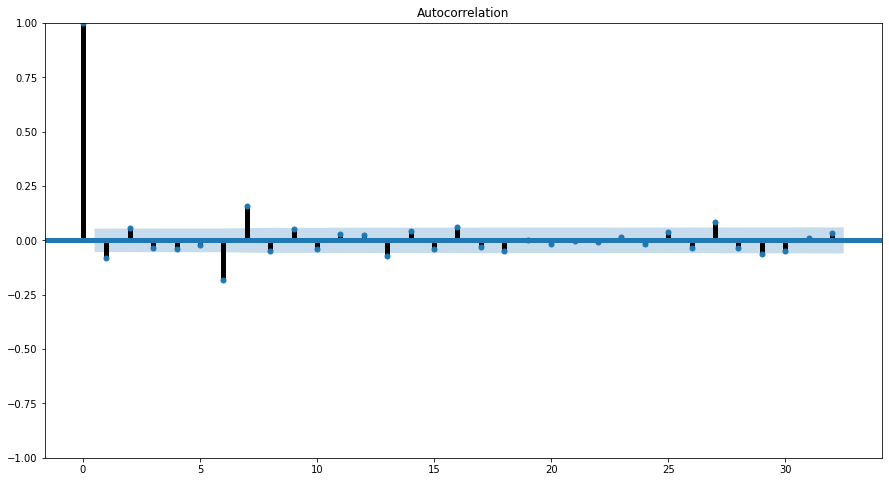

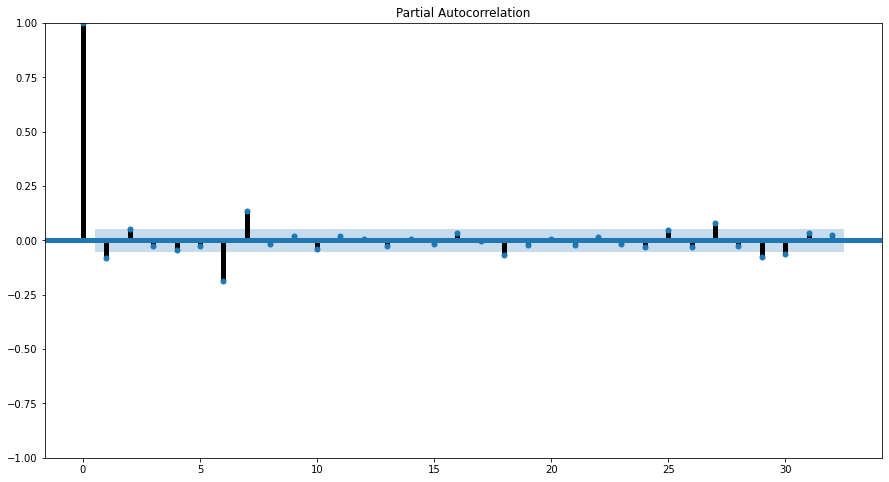

In [23]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Return"])
pacf = sgt.plot_pacf(amexdf["Return"])

In [24]:
# normal transformation
box_data, box_lambda = ss.boxcox(amexdf["Adj Close"])
yeo_data, yeo_lambda = ss.yeojohnson(amexdf["Return"])

print(f"old adjusted close skew: {ss.skew(amexdf['Adj Close'])} old kurtosis: {ss.kurtosis(amexdf['Adj Close'])}")
print(f"old return skew: {ss.skew(amexdf['Return'])} old kurtosis: {ss.kurtosis(amexdf['Return'])}")
print(f"box skew: {ss.skew(box_data)} old kurtosis: {ss.kurtosis(box_data)}")
print(f"yeo skew: {ss.skew(yeo_data)} old kurtosis: {ss.kurtosis(yeo_data)}")

old adjusted close skew: 0.8934527951536035 old kurtosis: -0.19489319200081257
old return skew: 0.711562040946855 old kurtosis: 20.10068376386415
box skew: 0.06518376793814507 old kurtosis: -0.7643267442078225
yeo skew: -0.1507327121431815 old kurtosis: 18.00521737312868


In [25]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(box_data)
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(box_data)
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(box_data, 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(box_data)
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (33.09055827546163, 6.523438444983043e-08)
AndersonResult(statistic=9.625619398937488, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.863154199061583, pvalue=0.0)
ShapiroWilkTest 0.9693253040313721 4.0128784093191477e-16


In [26]:
# import pmdarima as pmd
# model = pmd.auto_arima(rildf["Return"], max_p=10, max_q=10, max_d=3, max_order=20)
# model.summary()
# import pmdarima as pmd
# yeo_model = pmd.auto_arima(yeo_data, max_p=10, max_q=10, max_d=3, max_order=20)
# yeo_model.summary()
# import pmdarima as pmd
# box_model = pmd.auto_arima(box_data, max_p=10, max_q=10, max_d=3, max_order=20)
# box_model.summary()
# model.predict(n_periods=10)
# infy_df.reset_index(inplace=True)

In [27]:
# cutoff_date = '2021-12-31'
# xtrain, xtest = amexdf.loc[amexdf.index <= cutoff_date], amexdf.loc[amexdf.index > cutoff_date]

In [28]:
import pmdarima as pmd

maxlen = len(amexdf)
forecast1 = []

for ii in range(30):
  train_model = pmd.auto_arima(amexdf[ii:ii+maxlen-30]["Adj Close"], max_p=5, max_q=5, max_d=2, max_order=11)
  train_model.fit(amexdf[ii:ii+maxlen-30]["Adj Close"])
  forecast1.append(train_model.predict(n_periods=1).item())


ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 5), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

In [29]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast1, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.29


In [30]:
# import pmdarima as pmd
# train_model = pmd.auto_arima(amexdf[:-30]["Adj Close"], max_p=10, max_q=10, max_d=3, max_order=20)
# train_model.fit(amexdf[:-30]["Adj Close"])
# train_model.summary()

In [31]:
# forecast1 = train_model.predict(n_periods=30)

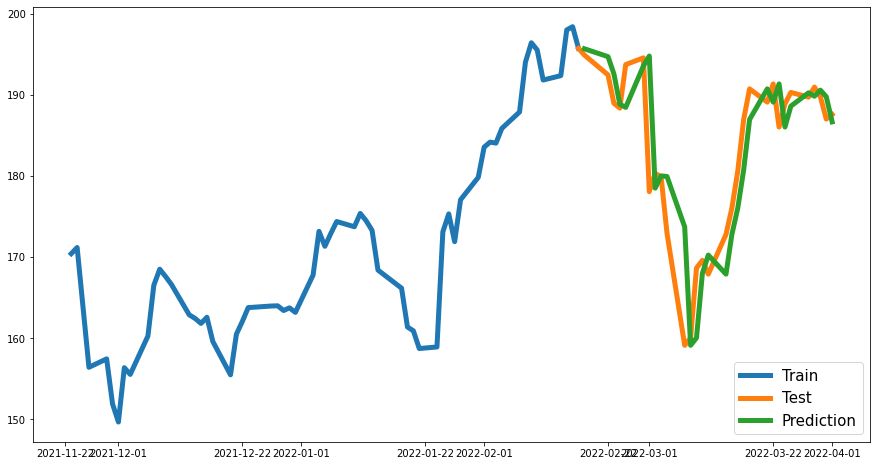

In [32]:
forecast1 = pd.DataFrame(forecast1, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast1, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [33]:
# xresiduals = xtest["Return"].values - forecast["Prediction"].values

In [34]:
# _ = sgt.plot_acf(xresiduals, lags=15)
# _ = sgt.plot_pacf(xresiduals, lags=15)


In [35]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit1 = ExponentialSmoothing(xtrain["Adj Close"], seasonal_periods=52, trend='mul', seasonal='mul')
# fit1 = fit1.fit()
# prediction = fit1.forecast(len(xtest)).copy()
# xresiduals = xtest["Adj Close"].values - prediction

In [36]:
# # fit1.params_formatted
# xtest.shape[0]/xtrain.shape[0]

In [37]:
# sgt.plot_acf(xresiduals, lags=15);
# sgt.plot_pacf(xresiduals, lags=15);

In [38]:
# prediction = pd.DataFrame(prediction.values, index = xtest.index, columns=['Prediction'])

In [39]:
# plt.plot(xtrain["Adj Close"], label="Train")
# plt.plot(xtest["Adj Close"], label="Test")
# plt.plot(prediction, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

In [40]:
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(xtest["Return"], forecast["Prediction"], squared=False)
# print(f"RMSE={rmse*100:.4f}%")

# 2. VAR

In [41]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [42]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781250,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925201,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050949,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581009,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679937,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [43]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf

,amex price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,117.484970,1788.199951,0.903310,1.926,23.581009
2019-11-08,117.669029,1785.880005,0.907466,1.933,23.679937
2019-11-11,117.116859,1771.650024,0.907240,1.943,23.650730
2019-11-12,117.107170,1778.000000,0.906170,1.909,23.698780
2019-11-13,116.496880,1753.109985,0.908070,1.870,23.698780
...,...,...,...,...,...
2022-03-28,189.699997,3379.810059,0.910590,2.468,34.250000
2022-03-29,190.940002,3386.300049,0.909600,2.400,34.779999
2022-03-30,189.759995,3326.020020,0.901590,2.358,34.549999


In [44]:
from statsmodels.tsa.vector_ar.var_model import VAR

maxlen = len(masterdf)
forecast2 = []

for ii in range(30):
  df = masterdf[ii:ii+maxlen-30]
  train_model = VAR(df)
  result = train_model.select_order(maxlags=10)
  result = train_model.fit(maxlags=result.aic)
  lagged_Values = df.values[-result.k_ar:]
  forecast2.append(result.forecast(y=lagged_Values, steps=1)[0][0])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [45]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(masterdf[-30:]["amex price"], forecast2, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.36


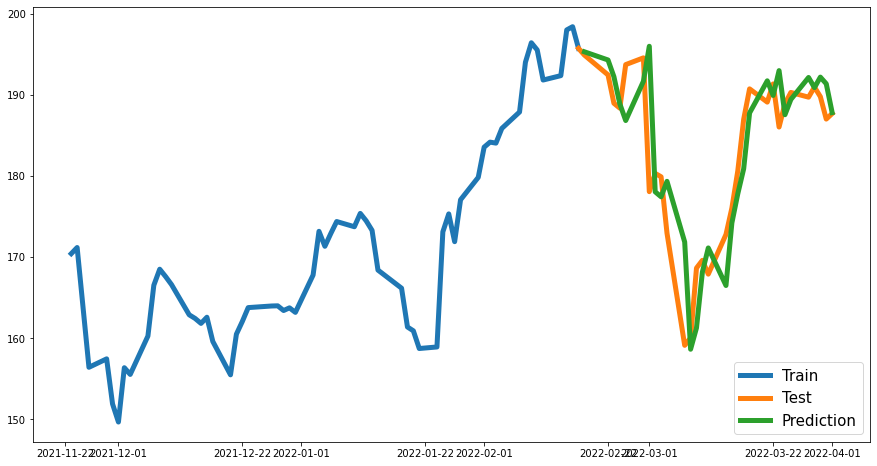

In [46]:
forecast2 = pd.DataFrame(forecast2, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast2, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [47]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# # masterdf = np.log(masterdf).diff(1).dropna()
# # masterdf
# model = VAR(masterdf[:-30])
# result = model.select_order(maxlags=10)
# result.summary()
# result = model.fit(maxlags=result.aic)
# # result.summary()
# lagged_Values = masterdf.values[-result.k_ar:]

# forecast2 = result.forecast(y=lagged_Values, steps=30) 
# forecast2 = pd.DataFrame(forecast2[:,0], index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])

# plt.plot(amexdf[-90:-29]["Adj Close"], label="Train")
# plt.plot(amexdf[-30:]["Adj Close"], label="Test")
# plt.plot(forecast2, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

# 3. Deep Learning - LSTM

In [5]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.dropna(inplace=True)
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925194,4635800,0.016260
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050964,3383000,-0.012403
2017-01-06,75.400002,75.919998,75.059998,75.470001,70.190460,3089600,0.001989


In [6]:
import torch

def sliding_window(ts, window_size=10):
  X = []
  Y = []
  ts = ts.tolist()

  for ii in range(window_size+1, len(ts)+1):
    X.append(ts[ii-(window_size+1):ii-1])
    Y.append(ts[ii-1])

  return torch.Tensor(X), torch.Tensor(Y)

In [7]:
xtrain, ytrain = sliding_window(amexdf["Adj Close"])

In [8]:
ytrain

tensor([ 71.3251,  70.8694,  70.6555,  ..., 189.7600, 187.0000, 187.1700])

In [9]:
import torch
import torch.nn as nn

class GRU(nn.Module):
  def __init__(self, hidden_size, in_size=1, out_size=1):
    super(GRU, self).__init__()
    self.hidden_size = hidden_size
    self.gru = nn.GRU(
        input_size = in_size,
        hidden_size = hidden_size,
        batch_first = True
    )
    self.fc = nn.Linear(hidden_size, out_size)

  def forward(self, x, h):
    # h = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.gru(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states 

  def init_state(self, batch_size):
    hidden = next(self.parameters()).data.new(batch_size, self.hidden_size).zero_()
    return hidden


In [51]:
hidden_size = 1024
learning_rate = 0.95
epochs = 1000

In [48]:
model = GRU(hidden_size = hidden_size)
model.cuda()
model.train()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)

GRU(
  (gru): GRU(1, 1000, batch_first=True)
  (fc): Linear(in_features=1000, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1000, batch_first=True)
  (fc): Linear(in_features=1000, out_features=1, bias=True)
)

In [19]:
losses = []
hidden = model.init_state(xtrain.size(0)-1)
hidden.cuda()
epochs = 1000
input = xtrain[:-1,:].unsqueeze(2)
input = input.cuda()
target = ytrain[:-1]
target = target.cuda()

for ii in range(1, epochs+1):
  hidden = hidden.data.unsqueeze(0)
  pred, hidden = model(input, hidden)
  # print(f"prediction: {pred.squeeze()}", f"actual: {ytrain[:-1]}")
  loss = criterion(target, pred.squeeze())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  # print(f"losses: {losses}")

  if (ii%50 == 0):
    print(f"epoch: {ii}... loss: {losses[-1]}")

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

epoch: 50... loss: 418.09771728515625
epoch: 100... loss: 237.83253479003906
epoch: 150... loss: 154.25828552246094
epoch: 200... loss: 105.39202117919922
epoch: 250... loss: 80.68547058105469
epoch: 300... loss: 68.89197540283203
epoch: 350... loss: 62.757694244384766
epoch: 400... loss: 58.72602081298828
epoch: 450... loss: 55.387977600097656
epoch: 500... loss: 52.28962326049805
epoch: 550... loss: 49.321014404296875
epoch: 600... loss: 46.4732780456543
epoch: 650... loss: 43.75969696044922
epoch: 700... loss: 41.194740295410156
epoch: 750... loss: 38.7893180847168
epoch: 800... loss: 36.550392150878906
epoch: 850... loss: 34.4811897277832
epoch: 900... loss: 32.5817756652832
epoch: 950... loss: 30.849365234375
epoch: 1000... loss: 29.278926849365234


In [17]:
xtrain[:-1,:].shape

torch.Size([1310, 10])

In [47]:
forecast3 = []

model.eval()
with torch.no_grad():
  pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
  forecast3.append(pred)

forecast3

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

[tensor([[180.6351]])]

In [12]:
# model.eval()
# xtrain[-1, :].shape
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
# xtrain[-1:, :].unsqueeze(2).shape
# hidden[-1:, :].unsqueeze(0).shape
# pred

In [52]:
import copy

maxlen = len(amexdf)
trainlist = []
forecast3 = []

for ii in range(30):
  model = GRU(hidden_size = hidden_size)
  model.cuda()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
  xtrain, ytrain = sliding_window(amexdf[ii:ii+maxlen-30+1]["Adj Close"])
  xtrain, ytrain = xtrain.cuda(), ytrain.cuda()

  losses = []
  hidden = model.init_state(xtrain.size(0)-1)

  model.train()

  for ii in range(1, epochs+1):
    hidden = hidden.data.unsqueeze(0)
    pred, hidden = model(xtrain[:-1, :].unsqueeze(2), hidden)
    loss = criterion(ytrain[:-1], pred.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (ii%50 == 0):
        print(f"epoch: {ii}... loss: {losses[-1]}")

  model.eval()
  with torch.no_grad():
    pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
    trainlist.append(copy.deepcopy(xtrain[-1:, :]))
    forecast3.append(pred)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1218.2900390625
epoch: 100... loss: 33.197330474853516
epoch: 150... loss: 24.342885971069336
epoch: 200... loss: 17.519201278686523
epoch: 250... loss: 12.84615421295166
epoch: 300... loss: 9.930811882019043
epoch: 350... loss: 8.251782417297363
epoch: 400... loss: 7.347012519836426
epoch: 450... loss: 6.88183069229126
epoch: 500... loss: 6.645263671875
epoch: 550... loss: 6.518403053283691
epoch: 600... loss: 6.440491199493408
epoch: 650... loss: 6.3832197189331055
epoch: 700... loss: 6.33451509475708
epoch: 750... loss: 6.289703369140625
epoch: 800... loss: 6.24717903137207
epoch: 850... loss: 6.206486701965332
epoch: 900... loss: 6.1675615310668945
epoch: 950... loss: 6.130434989929199
epoch: 1000... loss: 6.095150470733643


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 194.88946533203125
epoch: 100... loss: 26.494754791259766
epoch: 150... loss: 19.80630874633789
epoch: 200... loss: 15.193891525268555
epoch: 250... loss: 11.83421802520752
epoch: 300... loss: 9.573223114013672
epoch: 350... loss: 8.159002304077148
epoch: 400... loss: 7.3268561363220215
epoch: 450... loss: 6.859413146972656
epoch: 500... loss: 6.602843284606934
epoch: 550... loss: 6.459766387939453
epoch: 600... loss: 6.374024868011475
epoch: 650... loss: 6.315834999084473
epoch: 700... loss: 6.270574569702148
epoch: 750... loss: 6.231607437133789
epoch: 800... loss: 6.196134090423584
epoch: 850... loss: 6.163066387176514
epoch: 900... loss: 6.1320037841796875
epoch: 950... loss: 6.1028056144714355
epoch: 1000... loss: 6.075389862060547


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1244.3934326171875
epoch: 100... loss: 33.35596466064453
epoch: 150... loss: 23.660629272460938
epoch: 200... loss: 17.207307815551758
epoch: 250... loss: 13.068008422851562
epoch: 300... loss: 10.574227333068848
epoch: 350... loss: 9.104443550109863
epoch: 400... loss: 8.215547561645508
epoch: 450... loss: 7.643948554992676
epoch: 500... loss: 7.249864101409912
epoch: 550... loss: 6.963021755218506
epoch: 600... loss: 6.74714469909668
epoch: 650... loss: 6.581365585327148
epoch: 700... loss: 6.451981544494629
epoch: 750... loss: 6.34915018081665
epoch: 800... loss: 6.265600681304932
epoch: 850... loss: 6.196012020111084
epoch: 900... loss: 6.136570453643799
epoch: 950... loss: 6.084615230560303
epoch: 1000... loss: 6.038328170776367


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 924.304443359375
epoch: 100... loss: 32.38410568237305
epoch: 150... loss: 16.545215606689453
epoch: 200... loss: 11.704835891723633
epoch: 250... loss: 9.347930908203125
epoch: 300... loss: 8.315457344055176
epoch: 350... loss: 7.864211082458496
epoch: 400... loss: 7.630789279937744
epoch: 450... loss: 7.470573425292969
epoch: 500... loss: 7.335411548614502
epoch: 550... loss: 7.2117133140563965
epoch: 600... loss: 7.09615421295166
epoch: 650... loss: 6.9879374504089355
epoch: 700... loss: 6.886775016784668
epoch: 750... loss: 6.792429447174072
epoch: 800... loss: 6.704658031463623
epoch: 850... loss: 6.623220443725586
epoch: 900... loss: 6.5478620529174805
epoch: 950... loss: 6.478323936462402
epoch: 1000... loss: 6.41434383392334


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 240.66896057128906
epoch: 100... loss: 22.81098175048828
epoch: 150... loss: 16.929595947265625
epoch: 200... loss: 14.241415977478027
epoch: 250... loss: 12.642230033874512
epoch: 300... loss: 11.641016960144043
epoch: 350... loss: 10.932393074035645
epoch: 400... loss: 10.359759330749512
epoch: 450... loss: 9.858433723449707
epoch: 500... loss: 9.406311988830566
epoch: 550... loss: 8.996742248535156
epoch: 600... loss: 8.627241134643555
epoch: 650... loss: 8.29578685760498
epoch: 700... loss: 8.000019073486328
epoch: 750... loss: 7.737253665924072
epoch: 800... loss: 7.504653453826904
epoch: 850... loss: 7.2993645668029785
epoch: 900... loss: 7.118658542633057
epoch: 950... loss: 6.959951877593994
epoch: 1000... loss: 6.820862770080566


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1077.214111328125
epoch: 100... loss: 37.1990852355957
epoch: 150... loss: 24.143573760986328
epoch: 200... loss: 18.075618743896484
epoch: 250... loss: 13.712234497070312
epoch: 300... loss: 10.831733703613281
epoch: 350... loss: 9.067705154418945
epoch: 400... loss: 8.052226066589355
epoch: 450... loss: 7.49310827255249
epoch: 500... loss: 7.190001964569092
epoch: 550... loss: 7.020034313201904
epoch: 600... loss: 6.9146904945373535
epoch: 650... loss: 6.838901519775391
epoch: 700... loss: 6.776153564453125
epoch: 750... loss: 6.719287872314453
epoch: 800... loss: 6.66550874710083
epoch: 850... loss: 6.613851547241211
epoch: 900... loss: 6.564074993133545
epoch: 950... loss: 6.516178131103516
epoch: 1000... loss: 6.470225811004639


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 409.5030212402344
epoch: 100... loss: 44.919586181640625
epoch: 150... loss: 31.26323699951172
epoch: 200... loss: 23.423784255981445
epoch: 250... loss: 17.618488311767578
epoch: 300... loss: 13.6495943069458
epoch: 350... loss: 11.122775077819824
epoch: 400... loss: 9.606534004211426
epoch: 450... loss: 8.736384391784668
epoch: 500... loss: 8.247607231140137
epoch: 550... loss: 7.9682230949401855
epoch: 600... loss: 7.796356678009033
epoch: 650... loss: 7.676445960998535
epoch: 700... loss: 7.580460071563721
epoch: 750... loss: 7.4953107833862305
epoch: 800... loss: 7.415395736694336
epoch: 850... loss: 7.338565826416016
epoch: 900... loss: 7.2641496658325195
epoch: 950... loss: 7.192050933837891
epoch: 1000... loss: 7.122349739074707


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 812.9495239257812
epoch: 100... loss: 50.11679458618164
epoch: 150... loss: 33.735042572021484
epoch: 200... loss: 25.07731056213379
epoch: 250... loss: 18.62529182434082
epoch: 300... loss: 14.192395210266113
epoch: 350... loss: 11.358914375305176
epoch: 400... loss: 9.656572341918945
epoch: 450... loss: 8.684526443481445
epoch: 500... loss: 8.148184776306152
epoch: 550... loss: 7.853855609893799
epoch: 600... loss: 7.68533992767334
epoch: 650... loss: 7.578367233276367
epoch: 700... loss: 7.499943256378174
epoch: 750... loss: 7.434360504150391
epoch: 800... loss: 7.37465238571167
epoch: 850... loss: 7.317996501922607
epoch: 900... loss: 7.263354778289795
epoch: 950... loss: 7.210415840148926
epoch: 1000... loss: 7.159143924713135


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 394.1321105957031
epoch: 100... loss: 35.30188751220703
epoch: 150... loss: 18.266145706176758
epoch: 200... loss: 13.595476150512695
epoch: 250... loss: 11.113273620605469
epoch: 300... loss: 9.842268943786621
epoch: 350... loss: 9.142828941345215
epoch: 400... loss: 8.683906555175781
epoch: 450... loss: 8.326089859008789
epoch: 500... loss: 8.020150184631348
epoch: 550... loss: 7.7509589195251465
epoch: 600... loss: 7.51374626159668
epoch: 650... loss: 7.305975914001465
epoch: 700... loss: 7.125217914581299
epoch: 750... loss: 6.96877908706665
epoch: 800... loss: 6.833817958831787
epoch: 850... loss: 6.717496395111084
epoch: 900... loss: 6.617120265960693
epoch: 950... loss: 6.530214786529541
epoch: 1000... loss: 6.45457649230957


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 440.3763732910156
epoch: 100... loss: 27.537147521972656
epoch: 150... loss: 12.301125526428223
epoch: 200... loss: 9.794861793518066
epoch: 250... loss: 8.871586799621582
epoch: 300... loss: 8.407917022705078
epoch: 350... loss: 8.063371658325195
epoch: 400... loss: 7.764543056488037
epoch: 450... loss: 7.500986576080322
epoch: 500... loss: 7.271471977233887
epoch: 550... loss: 7.074464321136475
epoch: 600... loss: 6.9073805809021
epoch: 650... loss: 6.766940593719482
epoch: 700... loss: 6.649564743041992
epoch: 750... loss: 6.5516767501831055
epoch: 800... loss: 6.469913959503174
epoch: 850... loss: 6.401255130767822
epoch: 900... loss: 6.343093395233154
epoch: 950... loss: 6.293242931365967
epoch: 1000... loss: 6.249936580657959


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1131.66943359375
epoch: 100... loss: 24.19773292541504
epoch: 150... loss: 15.234782218933105
epoch: 200... loss: 11.785207748413086
epoch: 250... loss: 10.010501861572266
epoch: 300... loss: 9.139495849609375
epoch: 350... loss: 8.682221412658691
epoch: 400... loss: 8.388840675354004
epoch: 450... loss: 8.15608024597168
epoch: 500... loss: 7.94877815246582
epoch: 550... loss: 7.757339954376221
epoch: 600... loss: 7.579986572265625
epoch: 650... loss: 7.416695594787598
epoch: 700... loss: 7.2675251960754395
epoch: 750... loss: 7.132256507873535
epoch: 800... loss: 7.010401248931885
epoch: 850... loss: 6.901248931884766
epoch: 900... loss: 6.803937911987305
epoch: 950... loss: 6.717510223388672
epoch: 1000... loss: 6.640967845916748


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1212.35791015625
epoch: 100... loss: 41.79888916015625
epoch: 150... loss: 28.453689575195312
epoch: 200... loss: 21.842084884643555
epoch: 250... loss: 16.967079162597656
epoch: 300... loss: 13.635605812072754
epoch: 350... loss: 11.507535934448242
epoch: 400... loss: 10.221294403076172
epoch: 450... loss: 9.473889350891113
epoch: 500... loss: 9.045415878295898
epoch: 550... loss: 8.792583465576172
epoch: 600... loss: 8.630097389221191
epoch: 650... loss: 8.511174201965332
epoch: 700... loss: 8.412075996398926
epoch: 750... loss: 8.3216552734375
epoch: 800... loss: 8.235149383544922
epoch: 850... loss: 8.150749206542969
epoch: 900... loss: 8.0679292678833
epoch: 950... loss: 7.986666679382324
epoch: 1000... loss: 7.907105445861816


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1007.042236328125
epoch: 100... loss: 41.420257568359375
epoch: 150... loss: 26.8421630859375
epoch: 200... loss: 20.573930740356445
epoch: 250... loss: 15.749399185180664
epoch: 300... loss: 12.321975708007812
epoch: 350... loss: 10.049060821533203
epoch: 400... loss: 8.629359245300293
epoch: 450... loss: 7.7870635986328125
epoch: 500... loss: 7.307169437408447
epoch: 550... loss: 7.039908409118652
epoch: 600... loss: 6.8899312019348145
epoch: 650... loss: 6.801119804382324
epoch: 700... loss: 6.742691993713379
epoch: 750... loss: 6.698894023895264
epoch: 800... loss: 6.662159442901611
epoch: 850... loss: 6.629089832305908
epoch: 900... loss: 6.598272323608398
epoch: 950... loss: 6.569155216217041
epoch: 1000... loss: 6.541535377502441


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 601.8331298828125
epoch: 100... loss: 44.56357955932617
epoch: 150... loss: 27.01249885559082
epoch: 200... loss: 19.061845779418945
epoch: 250... loss: 13.890795707702637
epoch: 300... loss: 10.853879928588867
epoch: 350... loss: 9.22046184539795
epoch: 400... loss: 8.400711059570312
epoch: 450... loss: 8.004504203796387
epoch: 500... loss: 7.80824089050293
epoch: 550... loss: 7.698065757751465
epoch: 600... loss: 7.621837139129639
epoch: 650... loss: 7.5579609870910645
epoch: 700... loss: 7.4984049797058105
epoch: 750... loss: 7.440544128417969
epoch: 800... loss: 7.383697986602783
epoch: 850... loss: 7.327816963195801
epoch: 900... loss: 7.2730326652526855
epoch: 950... loss: 7.219497203826904
epoch: 1000... loss: 7.167361259460449


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 353.6297302246094
epoch: 100... loss: 41.180667877197266
epoch: 150... loss: 29.654504776000977
epoch: 200... loss: 22.873655319213867
epoch: 250... loss: 17.695613861083984
epoch: 300... loss: 14.022992134094238
epoch: 350... loss: 11.586285591125488
epoch: 400... loss: 10.05660343170166
epoch: 450... loss: 9.136070251464844
epoch: 500... loss: 8.594720840454102
epoch: 550... loss: 8.273871421813965
epoch: 600... loss: 8.073554992675781
epoch: 650... loss: 7.935591697692871
epoch: 700... loss: 7.82853364944458
epoch: 750... loss: 7.736577987670898
epoch: 800... loss: 7.652342319488525
epoch: 850... loss: 7.572683334350586
epoch: 900... loss: 7.496419906616211
epoch: 950... loss: 7.423199653625488
epoch: 1000... loss: 7.3530049324035645


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 84.2591552734375
epoch: 100... loss: 28.262624740600586
epoch: 150... loss: 20.33919334411621
epoch: 200... loss: 15.10750961303711
epoch: 250... loss: 12.134048461914062
epoch: 300... loss: 10.600375175476074
epoch: 350... loss: 9.838286399841309
epoch: 400... loss: 9.433703422546387
epoch: 450... loss: 9.175395011901855
epoch: 500... loss: 8.97153377532959
epoch: 550... loss: 8.787810325622559
epoch: 600... loss: 8.613419532775879
epoch: 650... loss: 8.445793151855469
epoch: 700... loss: 8.284802436828613
epoch: 750... loss: 8.13083267211914
epoch: 800... loss: 7.9842658042907715
epoch: 850... loss: 7.845351696014404
epoch: 900... loss: 7.714215278625488
epoch: 950... loss: 7.590856552124023
epoch: 1000... loss: 7.475188732147217


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1200.754638671875
epoch: 100... loss: 37.9028205871582
epoch: 150... loss: 24.966136932373047
epoch: 200... loss: 17.959909439086914
epoch: 250... loss: 14.251494407653809
epoch: 300... loss: 12.142138481140137
epoch: 350... loss: 10.764195442199707
epoch: 400... loss: 9.765549659729004
epoch: 450... loss: 9.014904022216797
epoch: 500... loss: 8.451990127563477
epoch: 550... loss: 8.035650253295898
epoch: 600... loss: 7.7314229011535645
epoch: 650... loss: 7.510181903839111
epoch: 700... loss: 7.348388195037842
epoch: 750... loss: 7.2279558181762695
epoch: 800... loss: 7.1356096267700195
epoch: 850... loss: 7.062004566192627
epoch: 900... loss: 7.0008416175842285
epoch: 950... loss: 6.947995185852051
epoch: 1000... loss: 6.900890827178955


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 121.53575897216797
epoch: 100... loss: 34.59965133666992
epoch: 150... loss: 27.315731048583984
epoch: 200... loss: 21.208951950073242
epoch: 250... loss: 16.544870376586914
epoch: 300... loss: 13.2494535446167
epoch: 350... loss: 11.07203483581543
epoch: 400... loss: 9.710756301879883
epoch: 450... loss: 8.894513130187988
epoch: 500... loss: 8.415529251098633
epoch: 550... loss: 8.13144588470459
epoch: 600... loss: 7.953230857849121
epoch: 650... loss: 7.829472541809082
epoch: 700... loss: 7.732606887817383
epoch: 750... loss: 7.648902416229248
epoch: 800... loss: 7.572007656097412
epoch: 850... loss: 7.499265193939209
epoch: 900... loss: 7.429683685302734
epoch: 950... loss: 7.362978458404541
epoch: 1000... loss: 7.29914665222168


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1100.4993896484375
epoch: 100... loss: 37.758522033691406
epoch: 150... loss: 26.604883193969727
epoch: 200... loss: 19.849578857421875
epoch: 250... loss: 14.999361038208008
epoch: 300... loss: 11.814603805541992
epoch: 350... loss: 9.876015663146973
epoch: 400... loss: 8.76734733581543
epoch: 450... loss: 8.161032676696777
epoch: 500... loss: 7.834357261657715
epoch: 550... loss: 7.651883125305176
epoch: 600... loss: 7.5387701988220215
epoch: 650... loss: 7.457082748413086
epoch: 700... loss: 7.389127731323242
epoch: 750... loss: 7.327352046966553
epoch: 800... loss: 7.268819332122803
epoch: 850... loss: 7.212565898895264
epoch: 900... loss: 7.158361434936523
epoch: 950... loss: 7.106226444244385
epoch: 1000... loss: 7.056248664855957


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 997.95556640625
epoch: 100... loss: 44.938987731933594
epoch: 150... loss: 28.989286422729492
epoch: 200... loss: 21.551109313964844
epoch: 250... loss: 16.098045349121094
epoch: 300... loss: 12.430562973022461
epoch: 350... loss: 10.139143943786621
epoch: 400... loss: 8.79351806640625
epoch: 450... loss: 8.040312767028809
epoch: 500... loss: 7.629432201385498
epoch: 550... loss: 7.402528762817383
epoch: 600... loss: 7.268245697021484
epoch: 650... loss: 7.178128242492676
epoch: 700... loss: 7.108412742614746
epoch: 750... loss: 7.048321723937988
epoch: 800... loss: 6.9933600425720215
epoch: 850... loss: 6.941807270050049
epoch: 900... loss: 6.893099308013916
epoch: 950... loss: 6.847072124481201
epoch: 1000... loss: 6.803697109222412


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1015.3251342773438
epoch: 100... loss: 46.50450134277344
epoch: 150... loss: 29.407840728759766
epoch: 200... loss: 20.94805335998535
epoch: 250... loss: 15.300445556640625
epoch: 300... loss: 11.882853507995605
epoch: 350... loss: 9.978994369506836
epoch: 400... loss: 8.983621597290039
epoch: 450... loss: 8.479582786560059
epoch: 500... loss: 8.21767807006836
epoch: 550... loss: 8.065421104431152
epoch: 600... loss: 7.959306716918945
epoch: 650... loss: 7.871743202209473
epoch: 700... loss: 7.791896820068359
epoch: 750... loss: 7.716014385223389
epoch: 800... loss: 7.6430277824401855
epoch: 850... loss: 7.5727715492248535
epoch: 900... loss: 7.505350112915039
epoch: 950... loss: 7.440889358520508
epoch: 1000... loss: 7.379497528076172


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 514.018798828125
epoch: 100... loss: 32.134761810302734
epoch: 150... loss: 17.71196746826172
epoch: 200... loss: 12.723302841186523
epoch: 250... loss: 10.01098918914795
epoch: 300... loss: 8.69608211517334
epoch: 350... loss: 8.10200023651123
epoch: 400... loss: 7.828173637390137
epoch: 450... loss: 7.679171085357666
epoch: 500... loss: 7.573794841766357
epoch: 550... loss: 7.483035564422607
epoch: 600... loss: 7.398073196411133
epoch: 650... loss: 7.316835880279541
epoch: 700... loss: 7.2391252517700195
epoch: 750... loss: 7.165162563323975
epoch: 800... loss: 7.095181465148926
epoch: 850... loss: 7.029340744018555
epoch: 900... loss: 6.967726230621338
epoch: 950... loss: 6.910333633422852
epoch: 1000... loss: 6.857115268707275


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 313.2764587402344
epoch: 100... loss: 40.54034423828125
epoch: 150... loss: 29.78887939453125
epoch: 200... loss: 23.053077697753906
epoch: 250... loss: 17.941423416137695
epoch: 300... loss: 14.338129997253418
epoch: 350... loss: 11.960447311401367
epoch: 400... loss: 10.472729682922363
epoch: 450... loss: 9.576025009155273
epoch: 500... loss: 9.04286003112793
epoch: 550... loss: 8.718538284301758
epoch: 600... loss: 8.507039070129395
epoch: 650... loss: 8.35338020324707
epoch: 700... loss: 8.228381156921387
epoch: 750... loss: 8.117676734924316
epoch: 800... loss: 8.01473617553711
epoch: 850... loss: 7.9168853759765625
epoch: 900... loss: 7.8231892585754395
epoch: 950... loss: 7.733430862426758
epoch: 1000... loss: 7.64762544631958


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1225.9853515625
epoch: 100... loss: 39.141700744628906
epoch: 150... loss: 29.623245239257812
epoch: 200... loss: 22.14273452758789
epoch: 250... loss: 16.668222427368164
epoch: 300... loss: 13.000603675842285
epoch: 350... loss: 10.719135284423828
epoch: 400... loss: 9.385896682739258
epoch: 450... loss: 8.643519401550293
epoch: 500... loss: 8.240501403808594
epoch: 550... loss: 8.01844596862793
epoch: 600... loss: 7.886509895324707
epoch: 650... loss: 7.796765327453613
epoch: 700... loss: 7.7258806228637695
epoch: 750... loss: 7.663354873657227
epoch: 800... loss: 7.604870796203613
epoch: 850... loss: 7.5488433837890625
epoch: 900... loss: 7.494784832000732
epoch: 950... loss: 7.4426398277282715
epoch: 1000... loss: 7.392458438873291


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1230.872314453125
epoch: 100... loss: 40.46855545043945
epoch: 150... loss: 31.0004940032959
epoch: 200... loss: 23.80051612854004
epoch: 250... loss: 18.862884521484375
epoch: 300... loss: 15.657768249511719
epoch: 350... loss: 13.597436904907227
epoch: 400... loss: 12.225324630737305
epoch: 450... loss: 11.250198364257812
epoch: 500... loss: 10.509568214416504
epoch: 550... loss: 9.92031478881836
epoch: 600... loss: 9.440744400024414
epoch: 650... loss: 9.048023223876953
epoch: 700... loss: 8.727046012878418
epoch: 750... loss: 8.465803146362305
epoch: 800... loss: 8.25381851196289
epoch: 850... loss: 8.081851959228516
epoch: 900... loss: 7.94182825088501
epoch: 950... loss: 7.826897621154785
epoch: 1000... loss: 7.731405735015869


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1159.29541015625
epoch: 100... loss: 31.966590881347656
epoch: 150... loss: 23.464086532592773
epoch: 200... loss: 17.23063087463379
epoch: 250... loss: 12.92889404296875
epoch: 300... loss: 10.234350204467773
epoch: 350... loss: 8.677447319030762
epoch: 400... loss: 7.834835052490234
epoch: 450... loss: 7.398088455200195
epoch: 500... loss: 7.172493934631348
epoch: 550... loss: 7.048382759094238
epoch: 600... loss: 6.969833850860596
epoch: 650... loss: 6.910831451416016
epoch: 700... loss: 6.860323429107666
epoch: 750... loss: 6.8140459060668945
epoch: 800... loss: 6.770517826080322
epoch: 850... loss: 6.729311466217041
epoch: 900... loss: 6.690332889556885
epoch: 950... loss: 6.653578758239746
epoch: 1000... loss: 6.6190385818481445


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1142.572509765625
epoch: 100... loss: 34.93534469604492
epoch: 150... loss: 24.534896850585938
epoch: 200... loss: 19.387357711791992
epoch: 250... loss: 15.773303031921387
epoch: 300... loss: 13.423059463500977
epoch: 350... loss: 11.983769416809082
epoch: 400... loss: 11.127549171447754
epoch: 450... loss: 10.60971450805664
epoch: 500... loss: 10.272289276123047
epoch: 550... loss: 10.024327278137207
epoch: 600... loss: 9.81851577758789
epoch: 650... loss: 9.632525444030762
epoch: 700... loss: 9.456854820251465
epoch: 750... loss: 9.28797721862793
epoch: 800... loss: 9.124908447265625
epoch: 850... loss: 8.967573165893555
epoch: 900... loss: 8.816216468811035
epoch: 950... loss: 8.67111587524414
epoch: 1000... loss: 8.532515525817871


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 806.8106689453125
epoch: 100... loss: 31.720415115356445
epoch: 150... loss: 18.612234115600586
epoch: 200... loss: 14.858636856079102
epoch: 250... loss: 12.411687850952148
epoch: 300... loss: 10.921142578125
epoch: 350... loss: 10.023894309997559
epoch: 400... loss: 9.452919960021973
epoch: 450... loss: 9.047142028808594
epoch: 500... loss: 8.723042488098145
epoch: 550... loss: 8.442710876464844
epoch: 600... loss: 8.190945625305176
epoch: 650... loss: 7.962287425994873
epoch: 700... loss: 7.754796504974365
epoch: 750... loss: 7.567465782165527
epoch: 800... loss: 7.399374961853027
epoch: 850... loss: 7.249434947967529
epoch: 900... loss: 7.116373062133789
epoch: 950... loss: 6.998819828033447
epoch: 1000... loss: 6.895339012145996


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 883.9297485351562
epoch: 100... loss: 39.77545928955078
epoch: 150... loss: 24.570846557617188
epoch: 200... loss: 18.68628692626953
epoch: 250... loss: 14.351850509643555
epoch: 300... loss: 11.425736427307129
epoch: 350... loss: 9.588079452514648
epoch: 400... loss: 8.500726699829102
epoch: 450... loss: 7.8848395347595215
epoch: 500... loss: 7.542346477508545
epoch: 550... loss: 7.34740686416626
epoch: 600... loss: 7.2271881103515625
epoch: 650... loss: 7.142934799194336
epoch: 700... loss: 7.0755815505981445
epoch: 750... loss: 7.016476631164551
epoch: 800... loss: 6.961994171142578
epoch: 850... loss: 6.910778045654297
epoch: 900... loss: 6.862363338470459
epoch: 950... loss: 6.816637992858887
epoch: 1000... loss: 6.773560047149658


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1241.6927490234375
epoch: 100... loss: 35.210391998291016
epoch: 150... loss: 27.60665512084961
epoch: 200... loss: 21.735443115234375
epoch: 250... loss: 17.155467987060547
epoch: 300... loss: 13.82705307006836
epoch: 350... loss: 11.556514739990234
epoch: 400... loss: 10.085824966430664
epoch: 450... loss: 9.169646263122559
epoch: 500... loss: 8.610702514648438
epoch: 550... loss: 8.267476081848145
epoch: 600... loss: 8.047213554382324
epoch: 650... loss: 7.893692493438721
epoch: 700... loss: 7.775164604187012
epoch: 750... loss: 7.674923419952393
epoch: 800... loss: 7.584744930267334
epoch: 850... loss: 7.500900745391846
epoch: 900... loss: 7.421820640563965
epoch: 950... loss: 7.346950054168701
epoch: 1000... loss: 7.276113986968994


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

In [53]:
forecast3 = torch.tensor(forecast3, device="cpu")

In [54]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast3, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=8.04


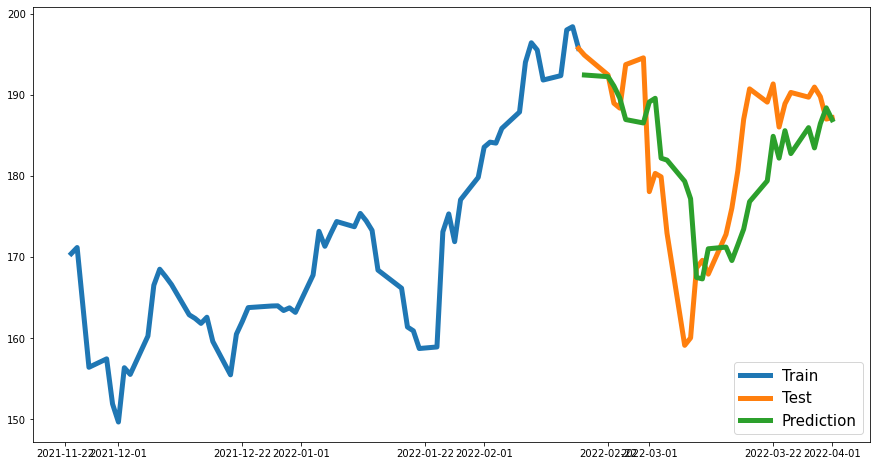

In [55]:
forecast3 = pd.DataFrame(forecast3, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast3, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 4. Machine Learning

In [ ]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [ ]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581013,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679937,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650734,3300


In [ ]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf = np.log(masterdf).diff(1).dropna()
masterdf.columns = [colname.replace("price", "return") for colname in masterdf.columns]

In [ ]:
masterdf.head(3)

,amex return,amazon return,euro return,treasury return,inflation return
Date,,,,,
2019-11-08,0.001565,-0.001298,0.004590,0.003628,0.004186
2019-11-11,-0.004703,-0.008000,-0.000249,0.005160,-0.001234
2019-11-12,-0.000083,0.003578,-0.001180,-0.017654,0.002029


In [ ]:
import copy

def ts2mldataset(ts, lag=5):
  dflist = []
  df = copy.deepcopy(masterdf)
  df.columns = [colname+"(t)" for colname in df.columns]
  dflist.append(df)

  for ii in range(1, lag+1):
    df = copy.deepcopy(masterdf)
    df.columns = [colname+f"(t-{ii})" for colname in df.columns]

    for jj in range(ii):
      df = df.shift(1)
    dflist.append(df)

  return pd.concat(dflist, axis=1)

In [ ]:
mldf = ts2mldataset(masterdf, lag=10)

In [ ]:
mldf.dropna(inplace=True)
mldf.shape
mldf.head(3)

,amex return(t),amazon return(t),euro return(t),treasury return(t),inflation return(t),amex return(t-1),amazon return(t-1),euro return(t-1),treasury return(t-1),inflation return(t-1),...,amex return(t-9),amazon return(t-9),euro return(t-9),treasury return(t-9),inflation return(t-9),amex return(t-10),amazon return(t-10),euro return(t-10),treasury return(t-10),inflation return(t-10)
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-22,0.002186,0.006327,0.001174,0.001128,0.003677,-0.004200,-0.006218,0.000103,0.019374,-0.001820,...,-0.004703,-0.008000,-0.000249,0.005160,-0.001234,0.001565,-0.001298,0.004590,0.003628,0.004186
2019-11-25,0.012852,0.015980,0.003921,-0.005653,0.008918,0.002186,0.006327,0.001174,0.001128,0.003677,...,-0.000083,0.003578,-0.001180,-0.017654,0.002029,-0.004703,-0.008000,-0.000249,0.005160,-0.001234
2019-11-26,-0.006739,0.012939,0.000738,-0.013699,0.002500,0.012852,0.015980,0.003921,-0.005653,0.008918,...,-0.005225,-0.014098,0.002095,-0.020641,0.000000,-0.000083,0.003578,-0.001180,-0.017654,0.002029


In [ ]:
from pycaret.regression import *
import pandas as pd

In [ ]:
demo = setup(data = mldf, target = 'amex return(t)', 
                   ignore_features = [],normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = False, remove_outliers= True,
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True) 

,Description,Value
0,session_id,3382
1,Target,amex return(t)
2,Original Data,"(593, 55)"
3,Missing Values,False
4,Numeric Features,54
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(394, 54)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0120,0.0003,0.0168,0.3915,0.0140,2.4378,0.016
huber,Huber Regressor,0.0123,0.0003,0.0173,0.3650,0.0146,2.5249,0.034
et,Extra Trees Regressor,0.0122,0.0004,0.0177,0.3427,0.0150,2.0965,0.692
br,Bayesian Ridge,0.0126,0.0003,0.0176,0.3266,0.0146,2.6804,0.018
rf,Random Forest Regressor,0.0124,0.0004,0.0179,0.3263,0.0151,2.2779,1.162
catboost,CatBoost Regressor,0.0127,0.0004,0.0182,0.3071,0.0156,2.1482,17.470
ada,AdaBoost Regressor,0.0123,0.0004,0.0183,0.3027,0.0153,1.7106,0.211
ridge,Ridge Regression,0.0132,0.0004,0.0182,0.2606,0.0148,3.0783,0.021
lr,Linear Regression,0.0132,0.0004,0.0182,0.2560,0.0148,3.0965,0.372
lar,Least Angle Regression,0.0135,0.0004,0.0185,0.2165,0.0149,3.1235,0.026


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [ ]:
xg_boost = create_model('xgboost')
tuned_xgboost = tune_model(xg_boost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0151,0.0005,0.0216,-0.2355,0.0155,1.3768
1,0.0105,0.0002,0.0129,0.1866,0.0116,4.1990
2,0.0152,0.0005,0.0228,0.0340,0.0191,2.2066
3,0.0181,0.0007,0.0267,0.1369,0.0200,4.1790
4,0.0120,0.0002,0.0157,0.2640,0.0097,1.6690
5,0.0169,0.0006,0.0237,0.3099,0.0216,2.1067
6,0.0134,0.0004,0.0208,-0.3456,0.0186,2.9258
7,0.0125,0.0002,0.0155,0.0397,0.0136,2.1001
8,0.0169,0.0010,0.0312,0.2310,0.0273,0.9639


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False
